In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("D:\\customer_segmentation.csv")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df.describe(include="all")

ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      Recency     MntWines  ...  \
count   2240.000000  2240.000000        2240  2240.000000  2240.000000  ...   
unique          NaN          NaN         663          NaN          NaN  ...   
top             NaN          NaN  31-08-2012          NaN          NaN  ...   
freq            NaN          NaN          12          NaN          NaN  ...   
mean       0.444196     0.506250         NaN    49.109375   303.935714  ...   
std        0.538398     0.544538         NaN    28.962453   336.597393  ...   
min        0.000000     0.000000         NaN     0.000000     0.000000  ...   
25%        0.000000     0.000000         NaN    24.000000    23.750000  ...   
50%        0.000000     0.000000         NaN    49.000000   173.500000  ...   
75%        1.000000     1.000000         NaN    74.000000   504.250000  ...   
max        2.000000     2.000000         NaN    99.000000  1493.000000  ...   

        NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count         2240.000000   2240.000000   2240.000000   2240.000000   
unique                NaN           NaN           NaN           NaN   
top                   NaN           NaN           NaN           NaN   
freq                  NaN           NaN           NaN           NaN   
mean             5.316518      0.072768      0.074554      0.072768   
std              2.426645      0.259813      0.262728      0.259813   
min              0.000000      0.000000      0.000000      0.000000   
25%              3.000000      0.000000      0.000000      0.000000   
50%              6.000000      0.000000      0.000000      0.000000   
75%              7.000000      0.000000      0.000000      0.000000   
max             20.000000      1.000000      1.000000      1.000000   

        AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count    2240.000000   2240.000000  2240.000000         2240.0     2240.0   
unique           NaN           NaN          NaN            NaN        NaN   
top              NaN           NaN          NaN            NaN        NaN   
freq             NaN           NaN          NaN            NaN        NaN   
mean        0.064286      0.013393     0.009375            3.0       11.0   
std         0.245316      0.114976     0.096391            0.0        0.0   
min         0.000000      0.000000     0.000000            3.0       11.0   
25%         0.000000      0.000000     0.000000            3.0       11.0   
50%         0.000000      0.000000     0.000000            3.0       11.0   
75%         0.000000      0.000000     0.000000            3.0       11.0   
max         1.000000      1.000000     1.000000            3.0       11.0   

           Response  
count   2240.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.149107  
std        0.356274  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[11 rows x 29 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
for column in df.columns:
    print(f"Value counts for column {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for column ID:
ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: count, Length: 2240, dtype: int64


Value counts for column Year_Birth:
Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64


Value counts for column Education:
Education
Graduation    1127
PhD            486
Master    

In [9]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], errors='coerce')
df["Year_Customer"] = df["Dt_Customer"].dt.year
df["Month_Customer"] = df["Dt_Customer"].dt.month
df["Day_Customer"] = df["Dt_Customer"].dt.day

In [10]:
df["Education_numeric"] =df["Education"].map({"Graduation":1,"PhD":2,"Master":3,"2n Cycle":4,"Basic":5})
df["Marital_numeric"] =df["Marital_Status"].map({"Married":1,"Together":2,"Single":3,"Divorced":4,"Widow":5,"Alone":6,"Absurd":7,"YOLO":8})

In [11]:
df.columns=df.columns.str.strip()

In [12]:
df=df.drop(["ID","Dt_Customer","Month_Customer","Day_Customer"], axis=1)

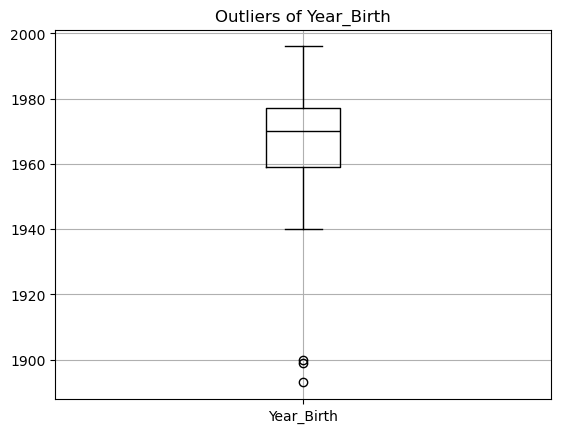

Column 'Education' not found in the DataFrame!
Column 'Marital_Status' not found in the DataFrame!


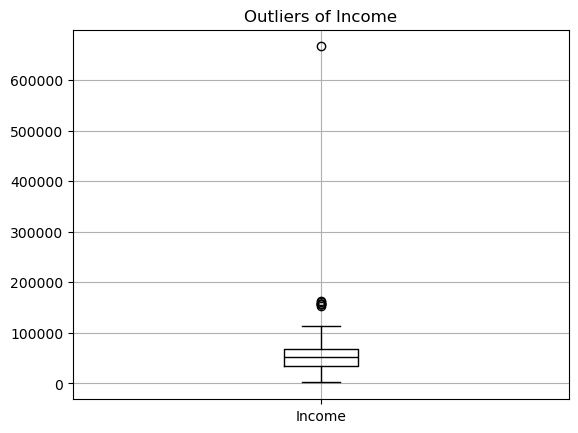

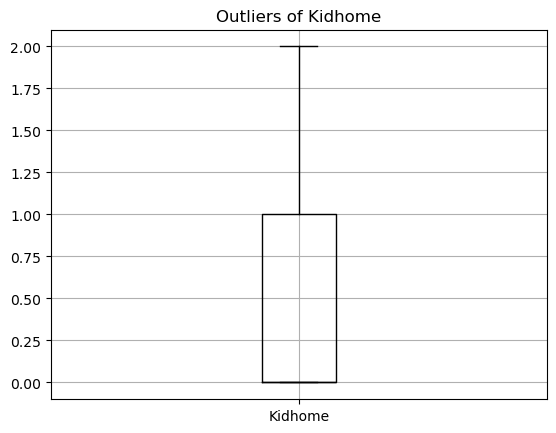

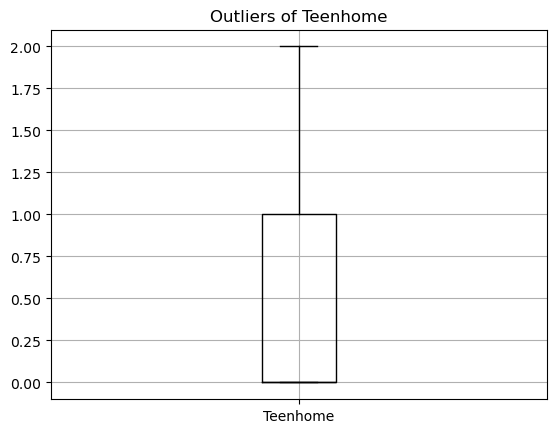

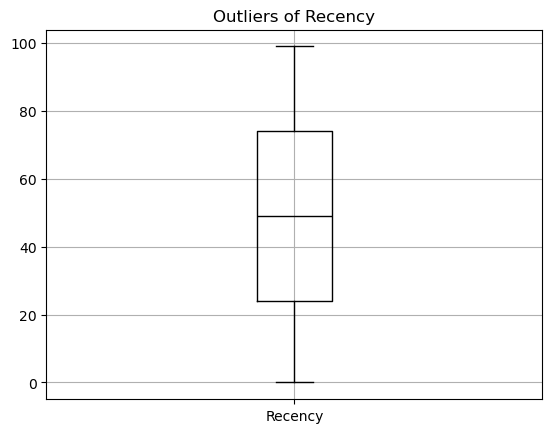

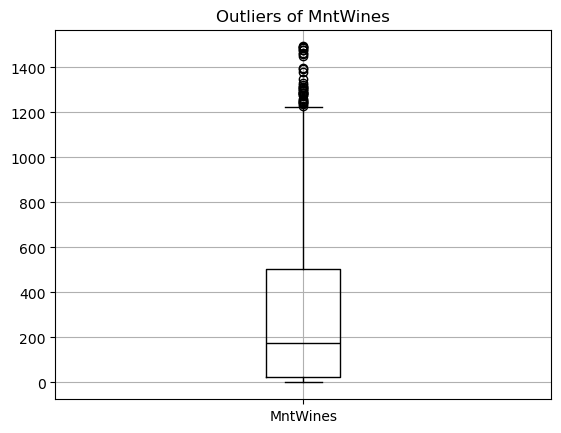

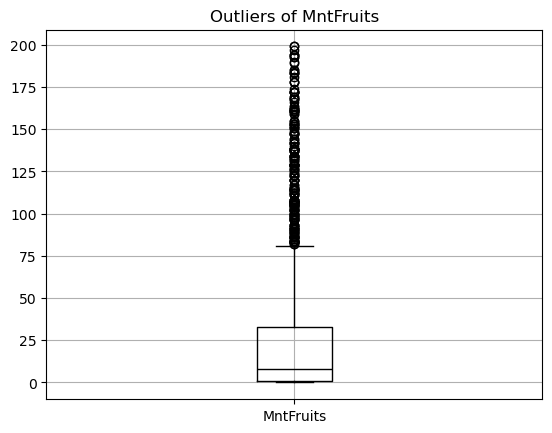

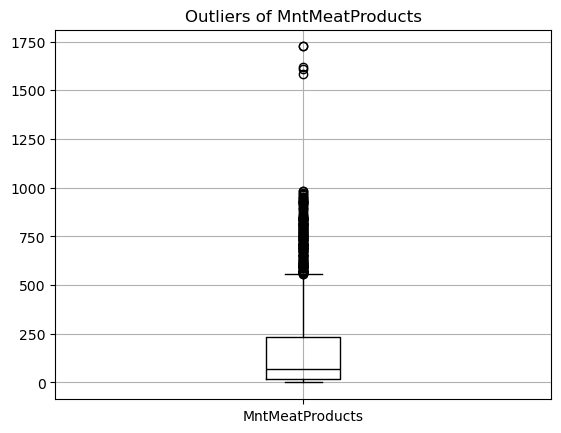

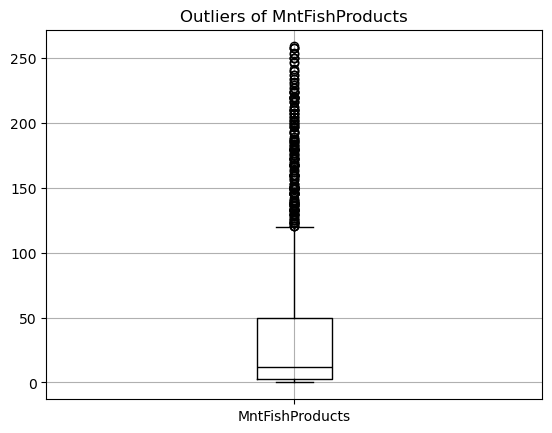

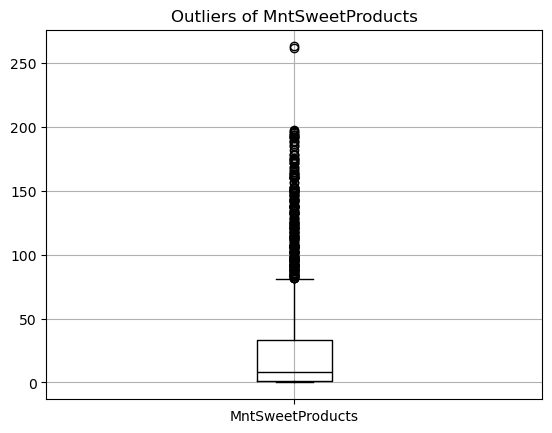

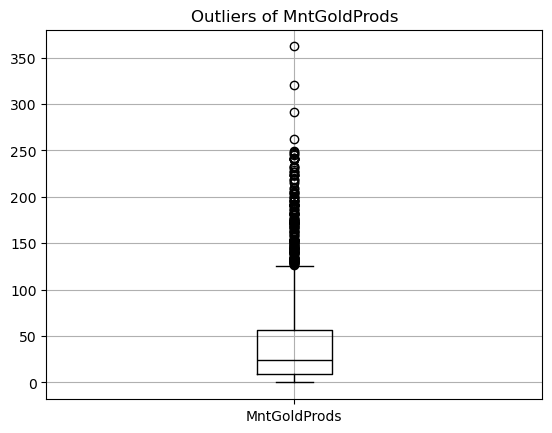

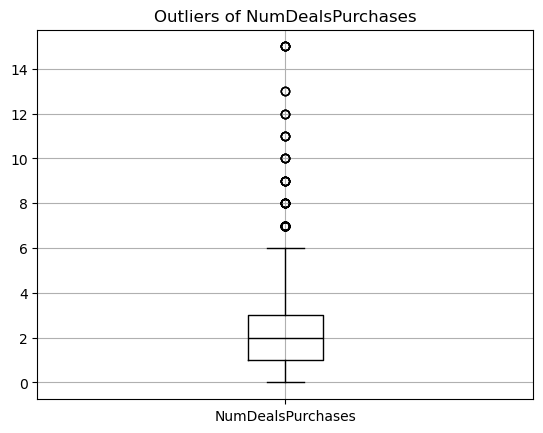

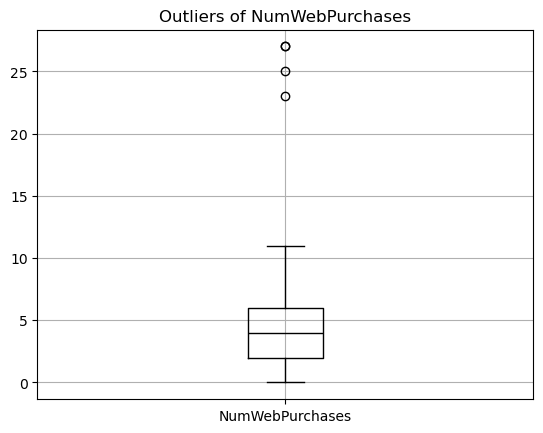

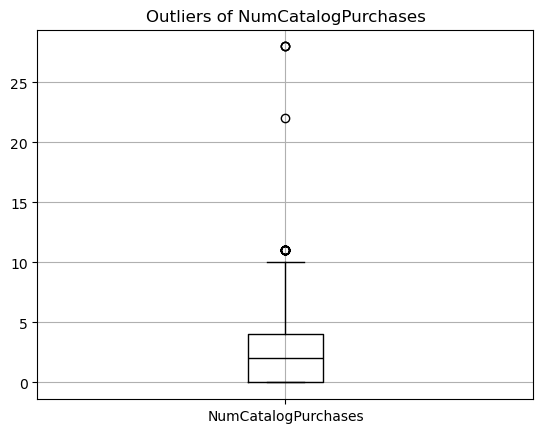

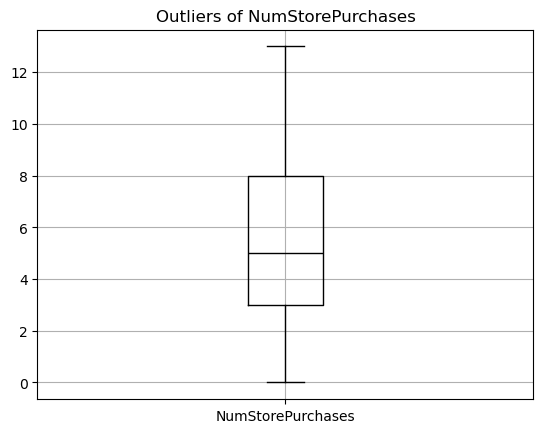

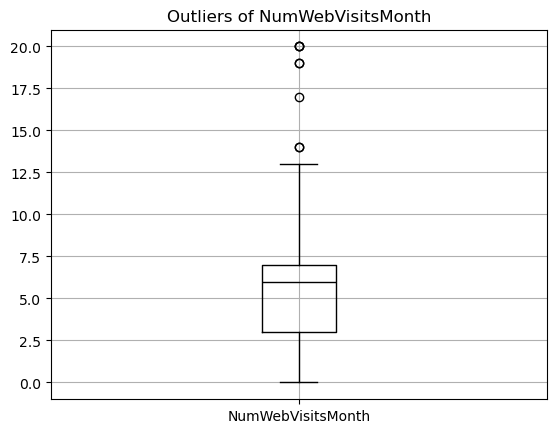

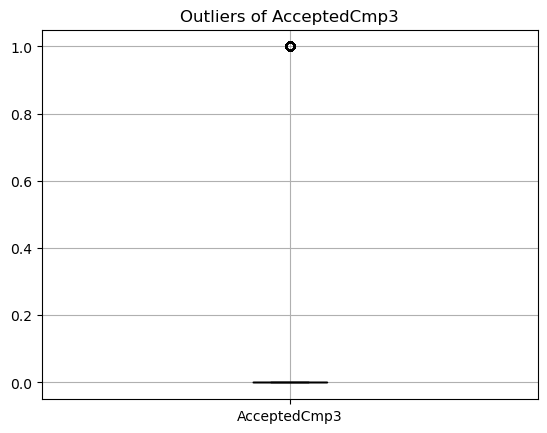

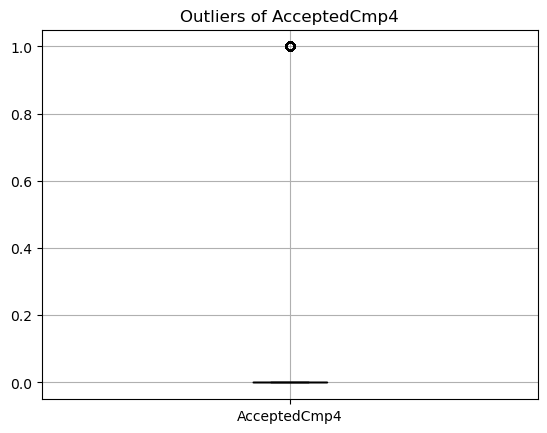

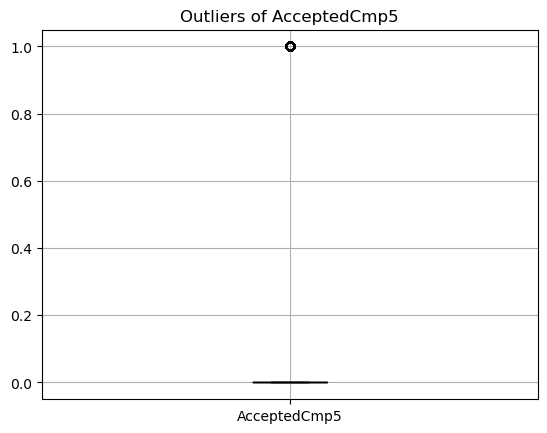

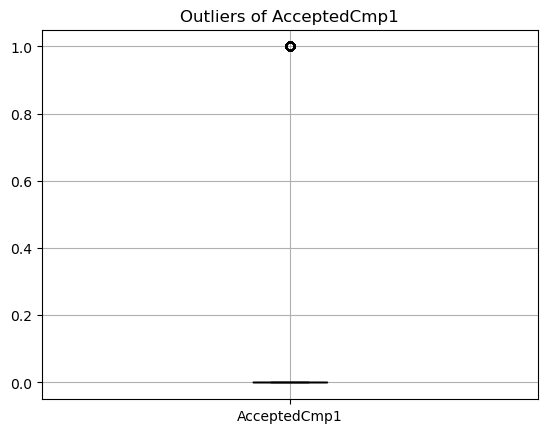

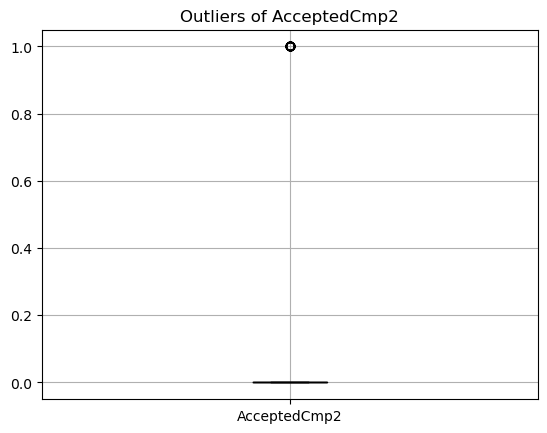

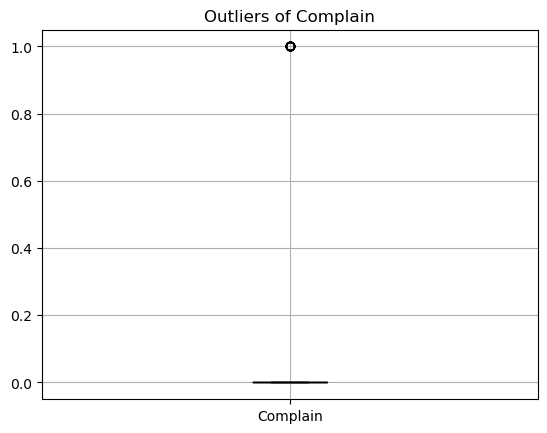

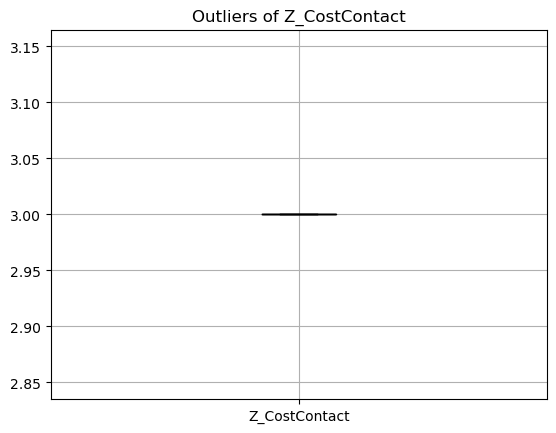

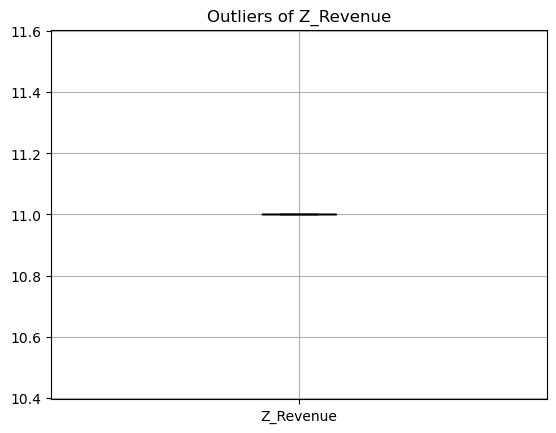

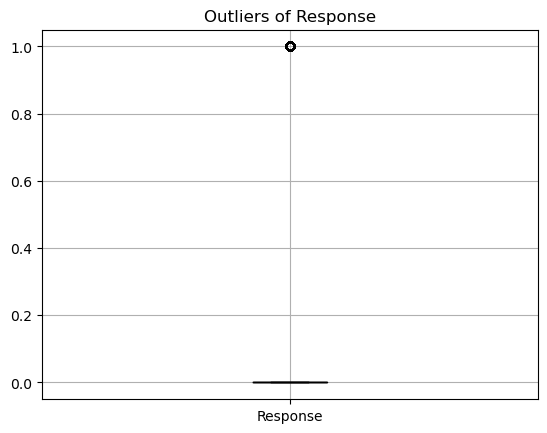

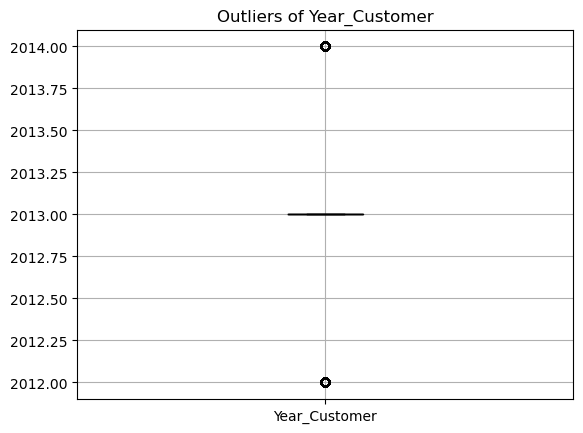

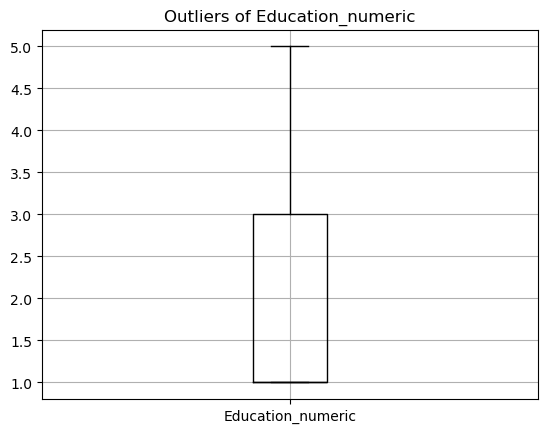

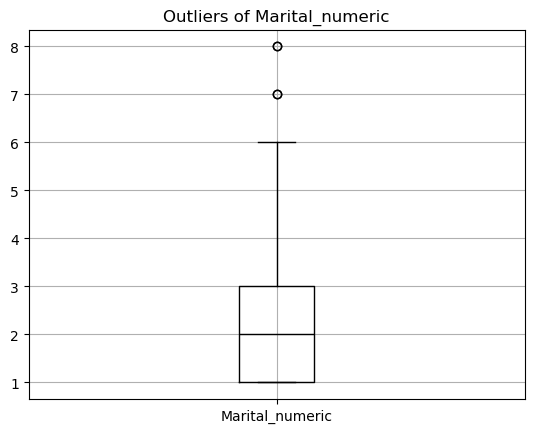

In [13]:
for c in df.columns:
    try:
        df.boxplot(column=[c], color='black')
        plt.title(f"Outliers of {c}")
        plt.show()
    except KeyError:
        print(f"Column '{c}' not found in the DataFrame!")


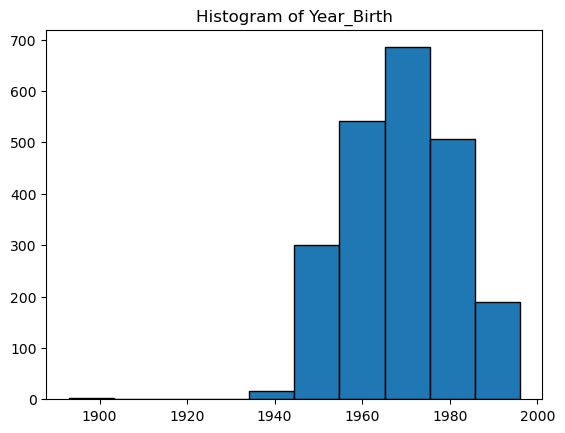

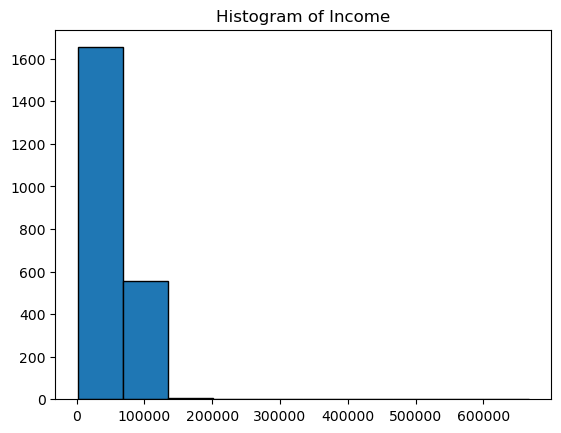

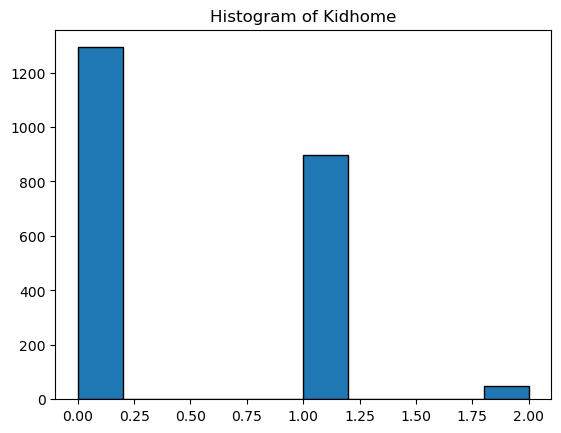

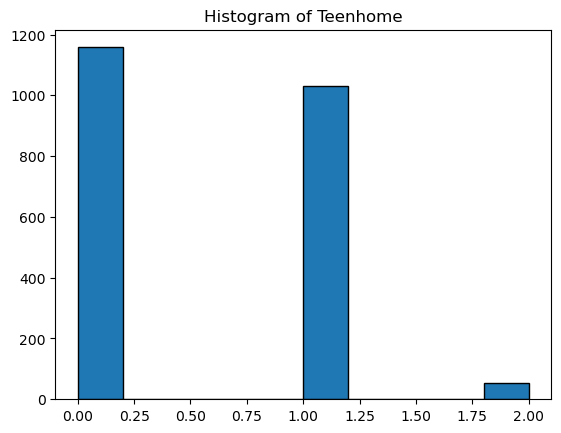

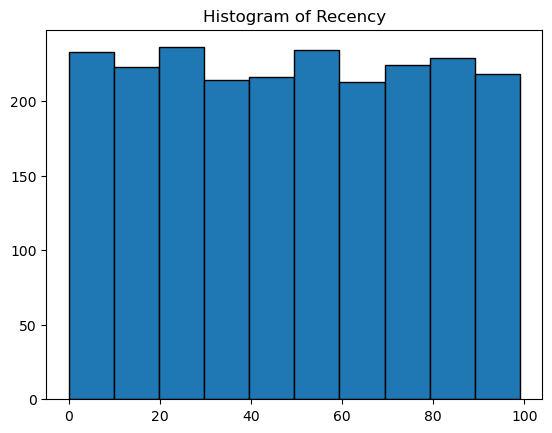

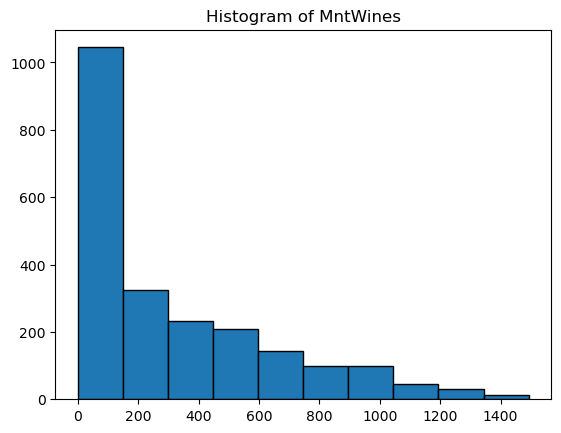

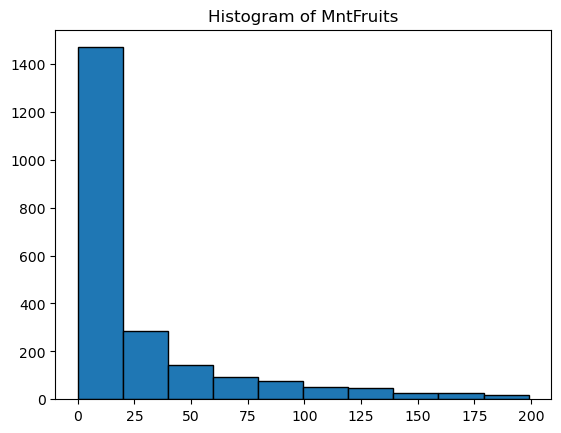

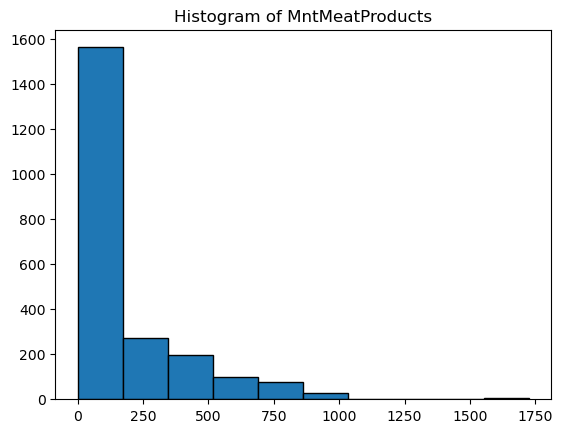

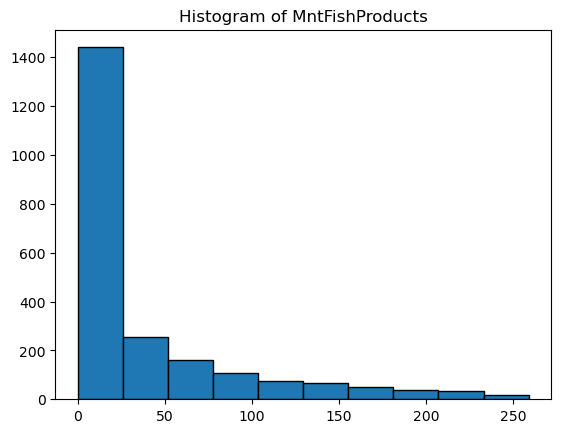

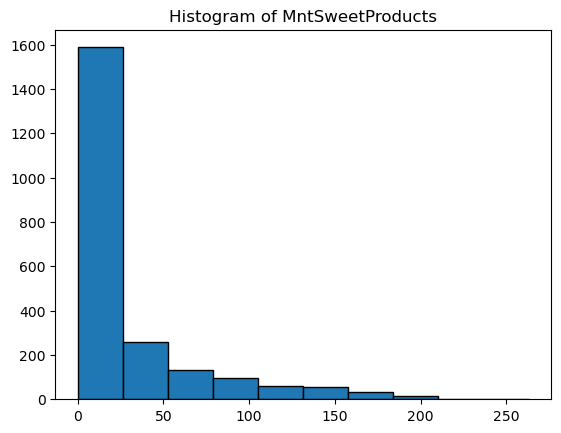

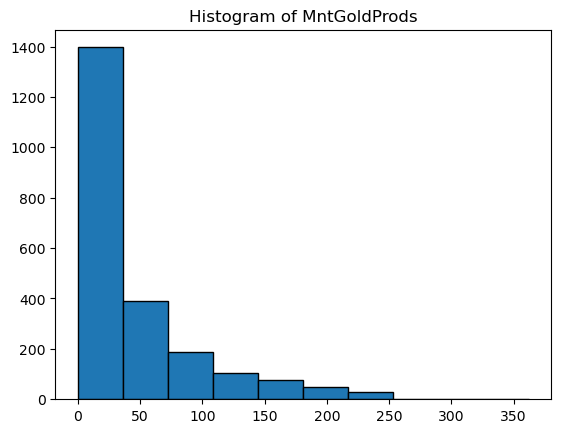

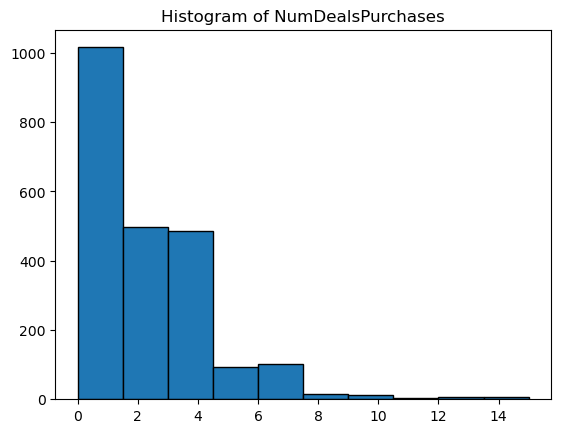

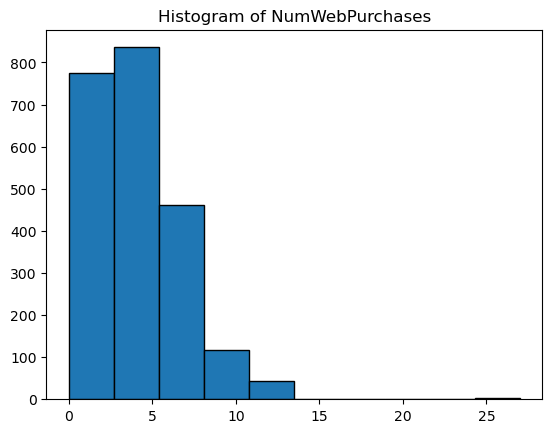

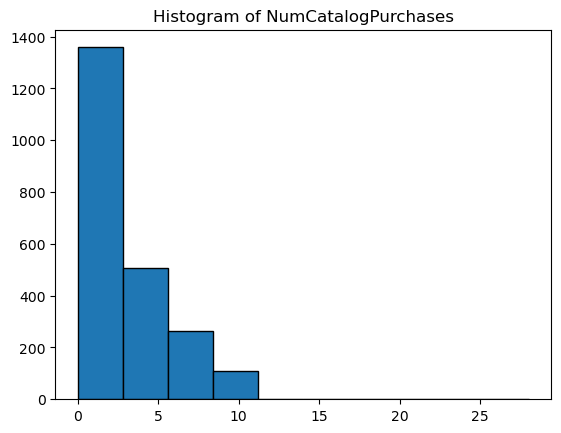

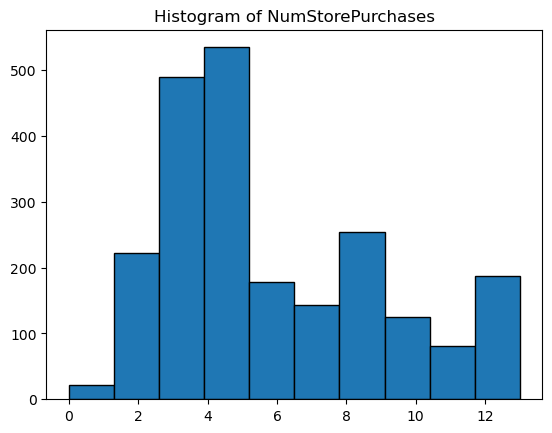

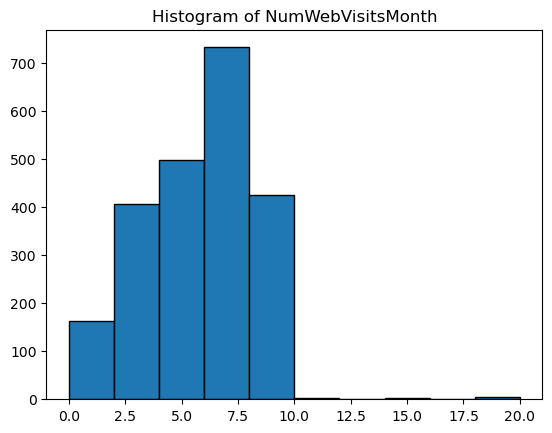

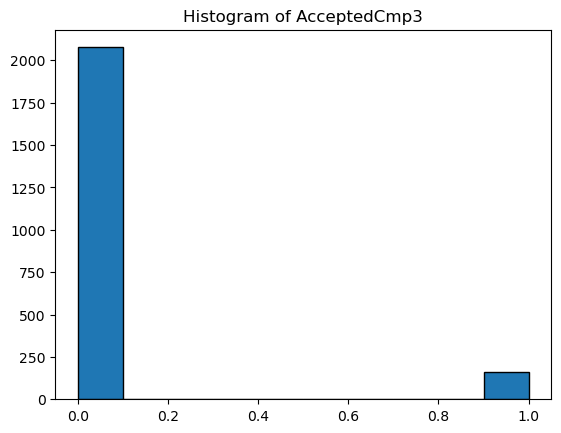

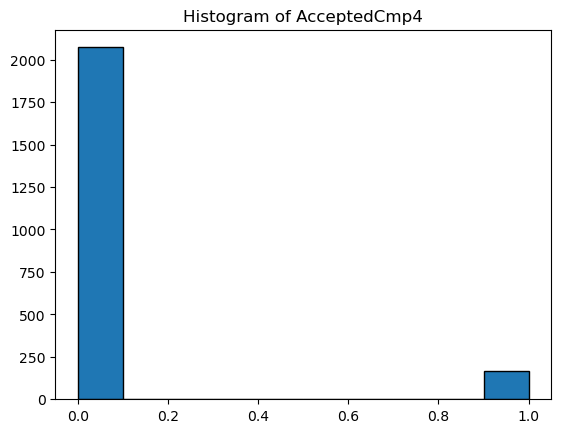

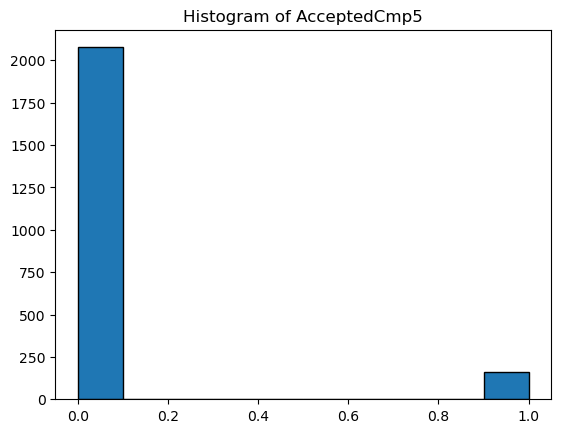

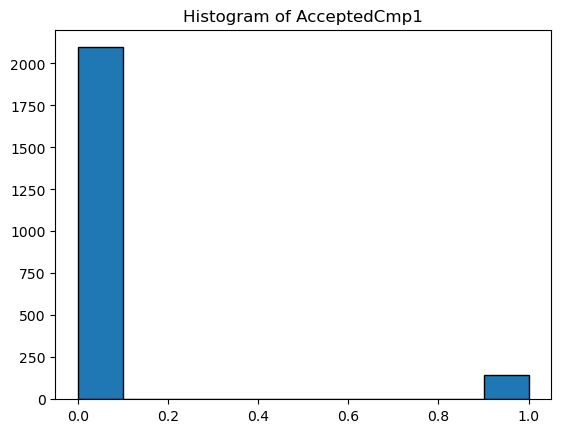

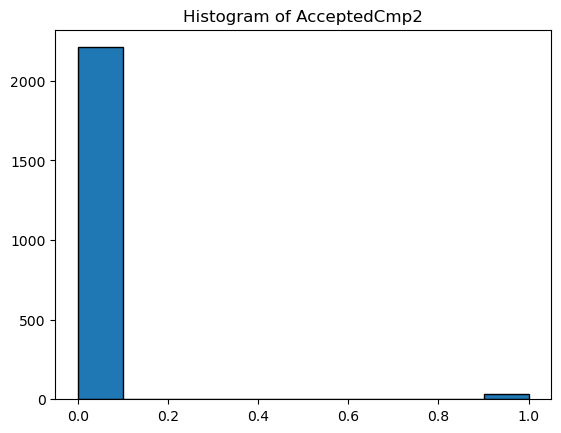

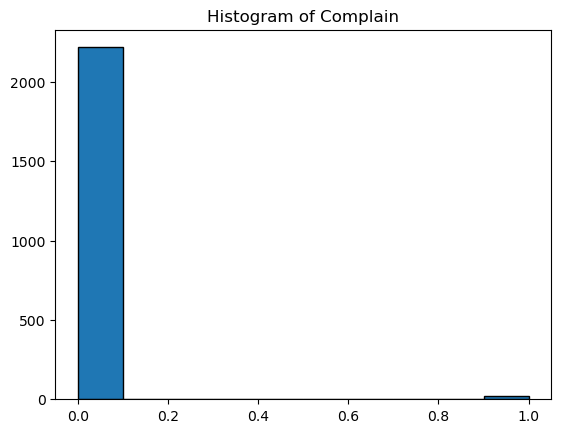

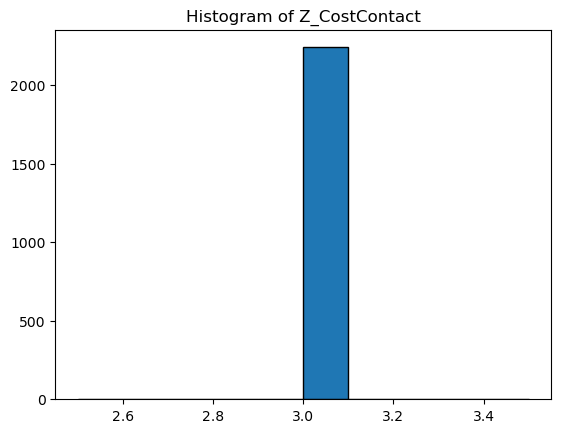

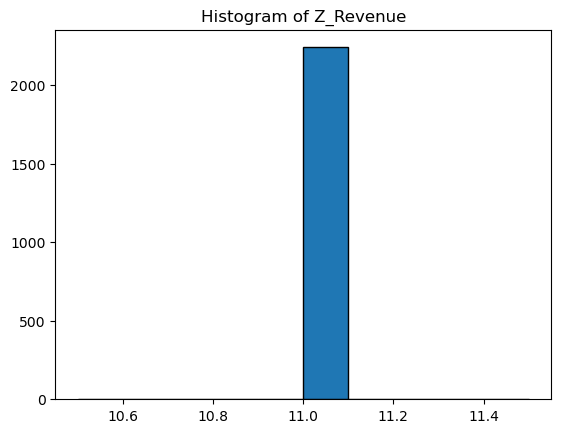

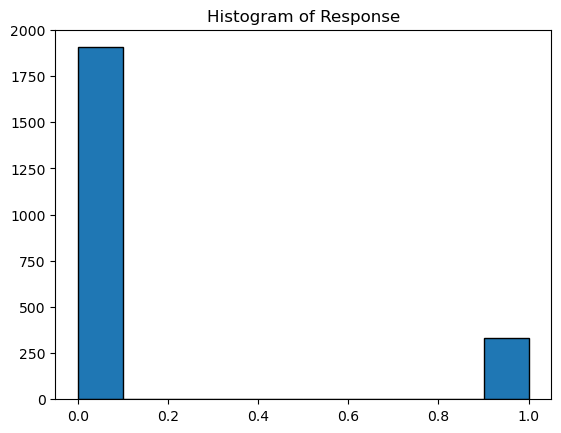

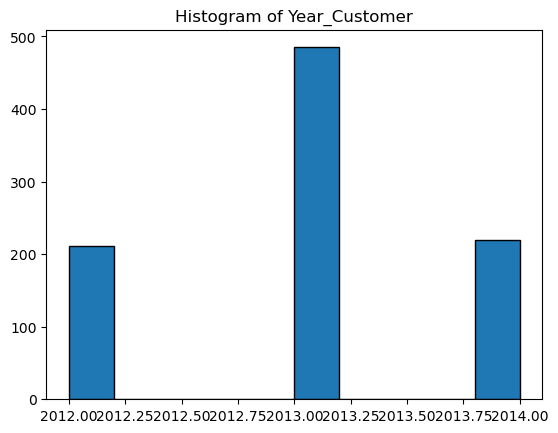

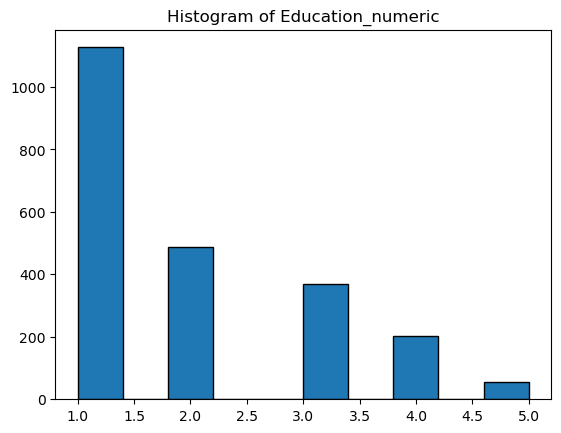

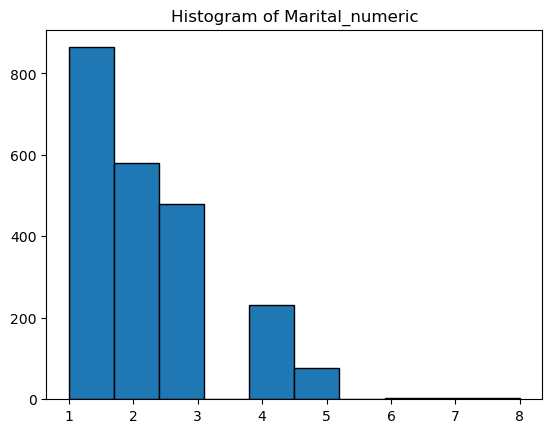

In [14]:
for c in df.select_dtypes(include=["number","datetime"]).columns:
    try:
        df.hist(column=c, grid=False, edgecolor='black')
        plt.title(f"Histogram of {c}")
        plt.show()
    except Exception as e:
        print(f"Error plotting for column {c}: {e}")


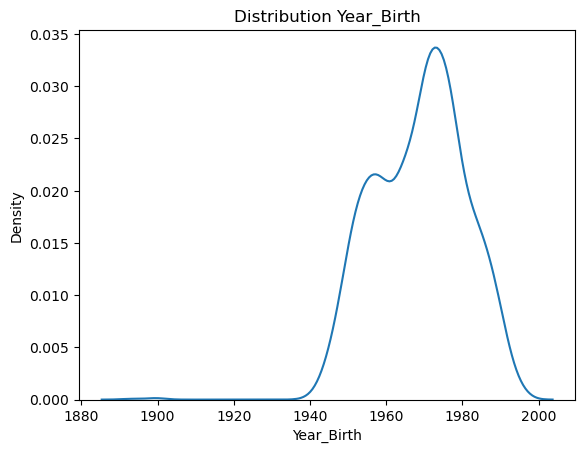

Error plotting for column Education: The x variable is categorical, but one of ['numeric', 'datetime'] is required
Error plotting for column Marital_Status: The x variable is categorical, but one of ['numeric', 'datetime'] is required


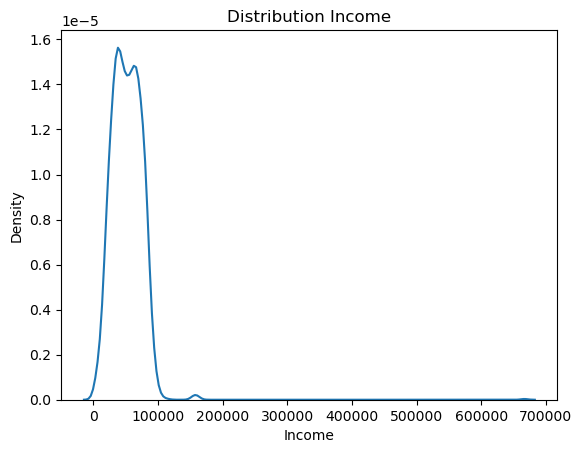

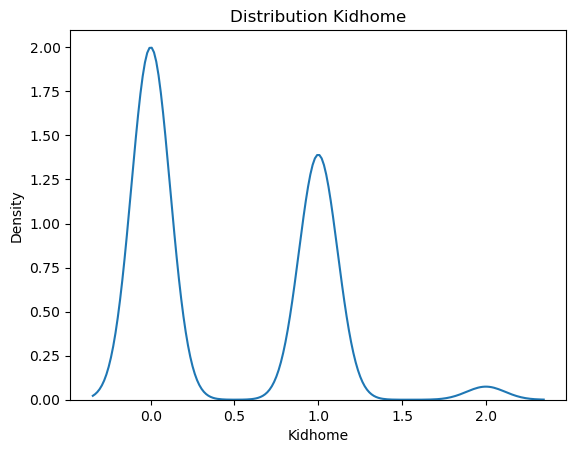

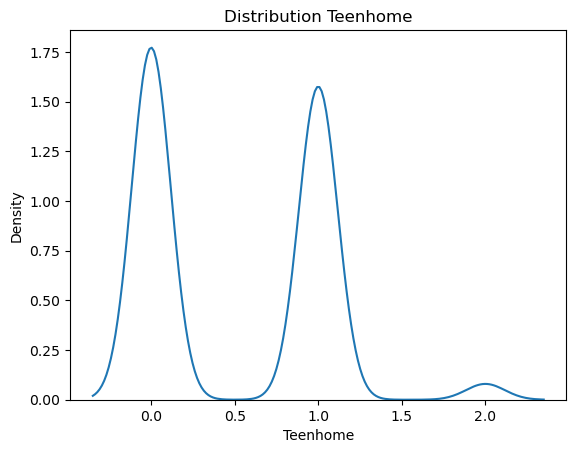

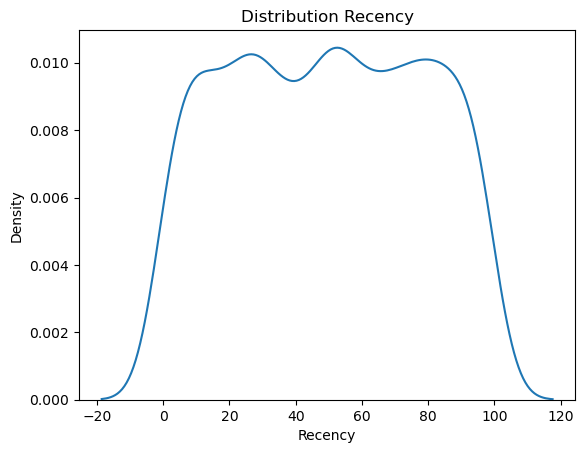

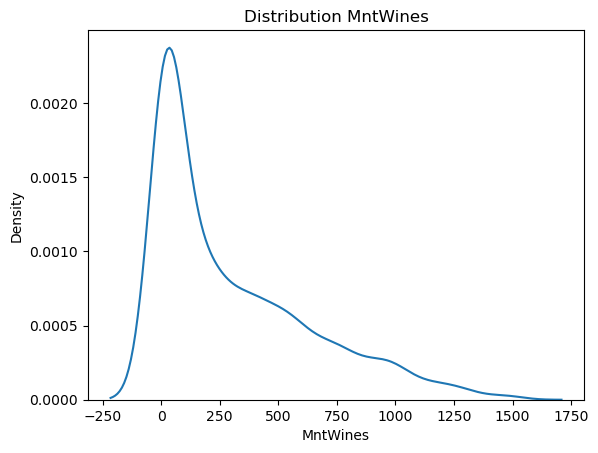

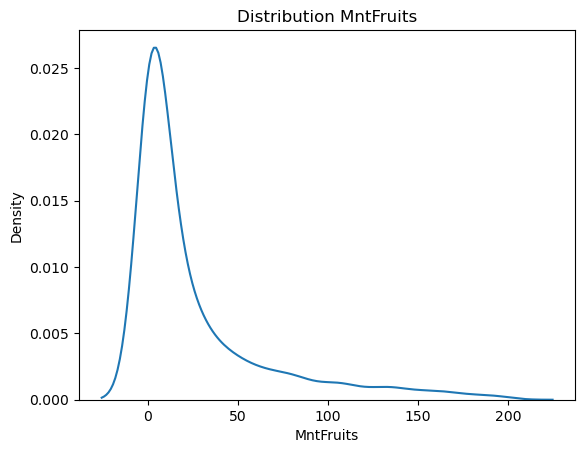

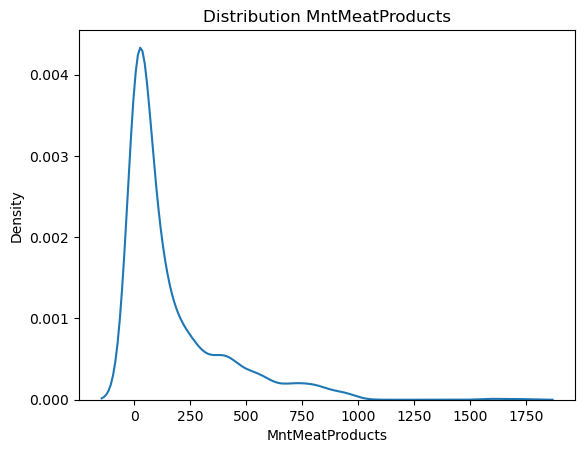

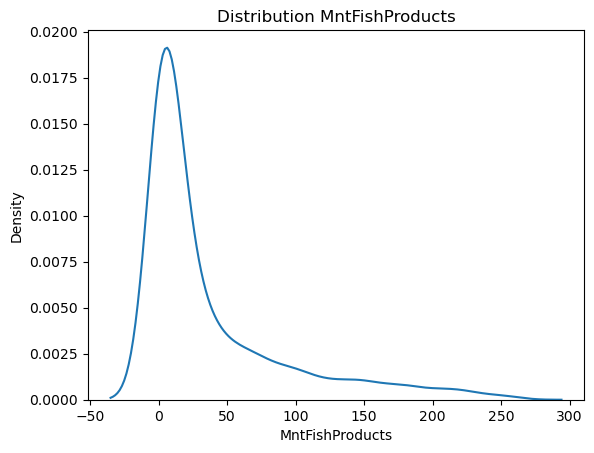

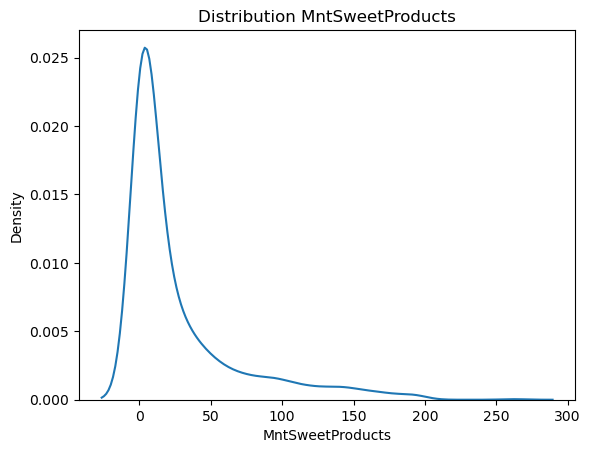

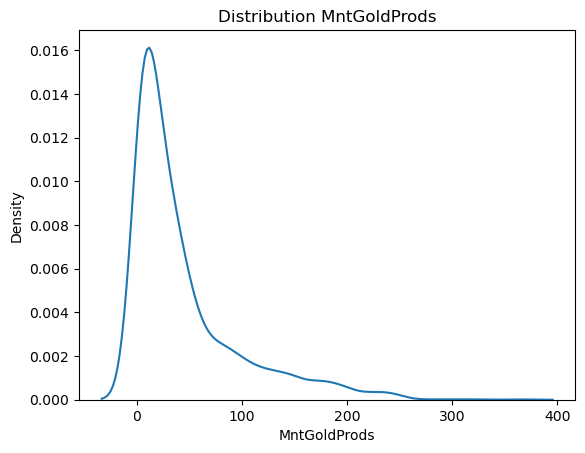

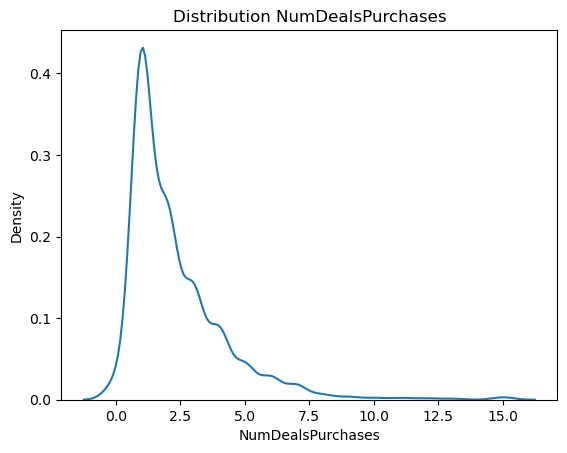

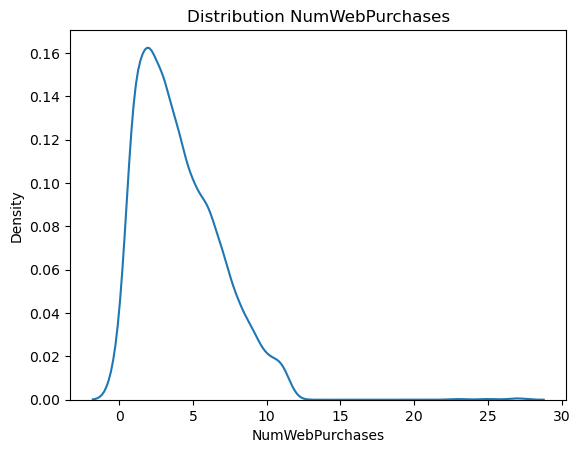

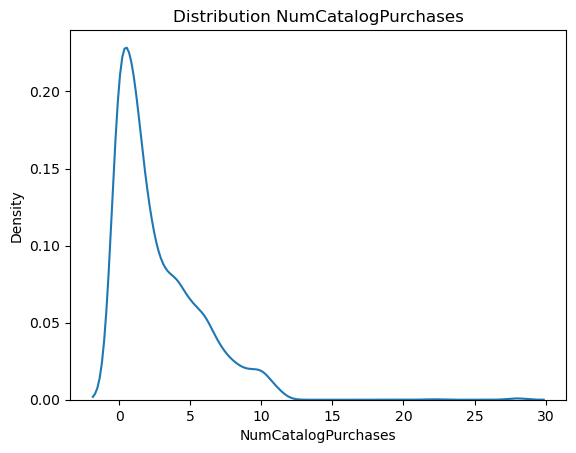

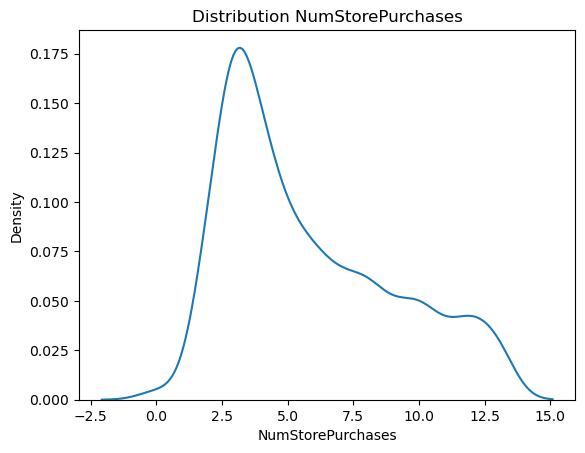

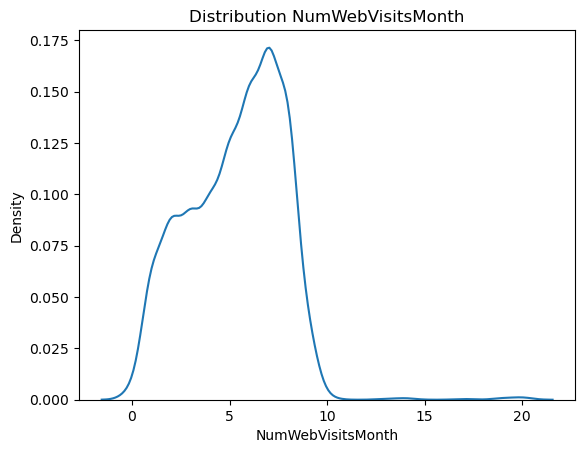

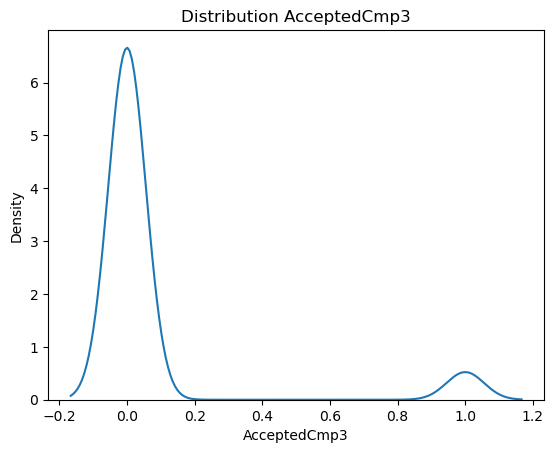

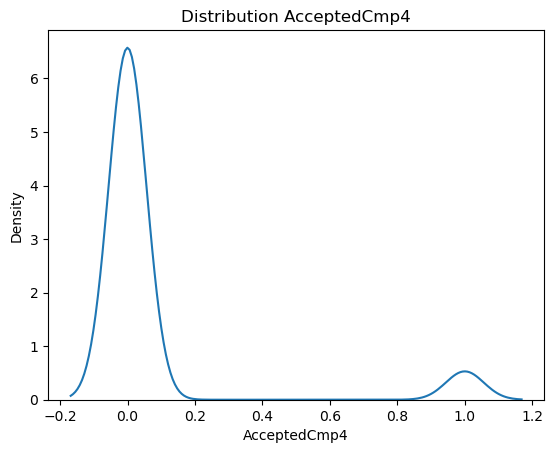

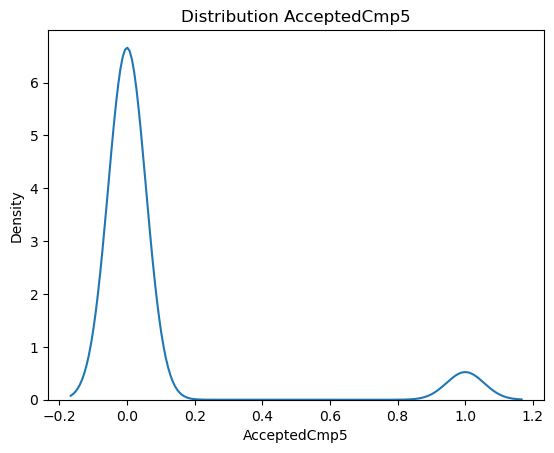

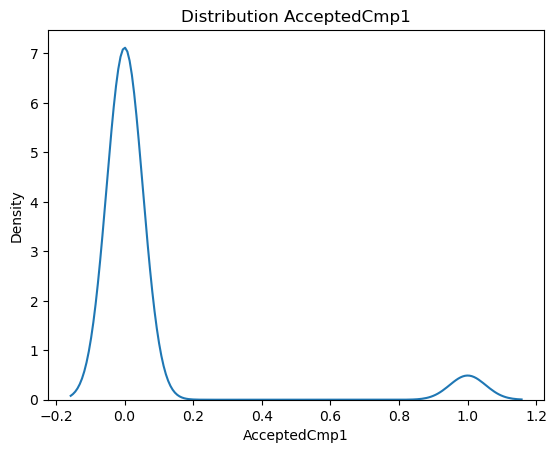

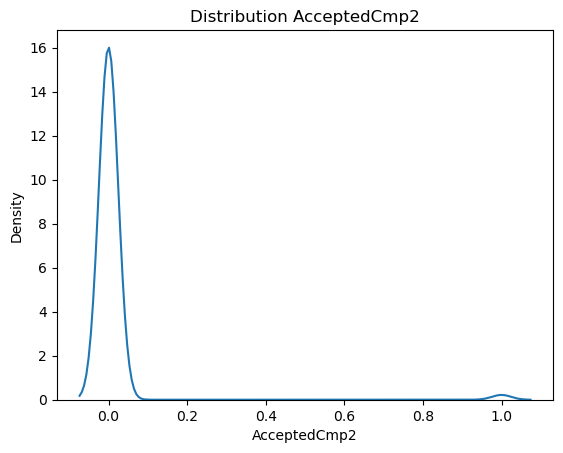

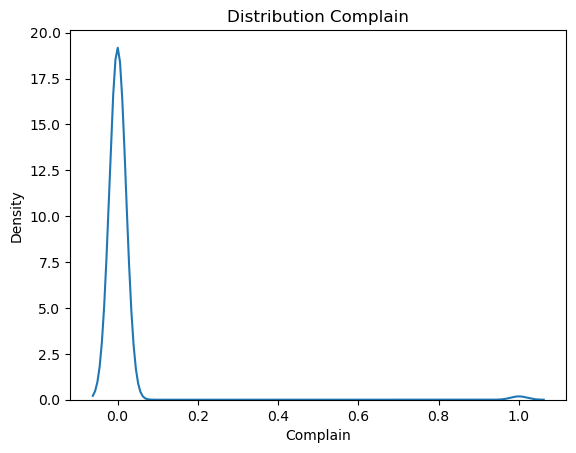

C:\Users\farida hassan\AppData\Local\Temp\ipykernel_9584\3991246227.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[c])


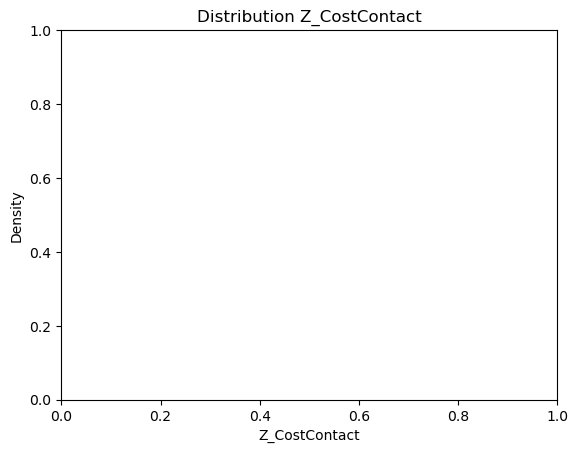

C:\Users\farida hassan\AppData\Local\Temp\ipykernel_9584\3991246227.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[c])


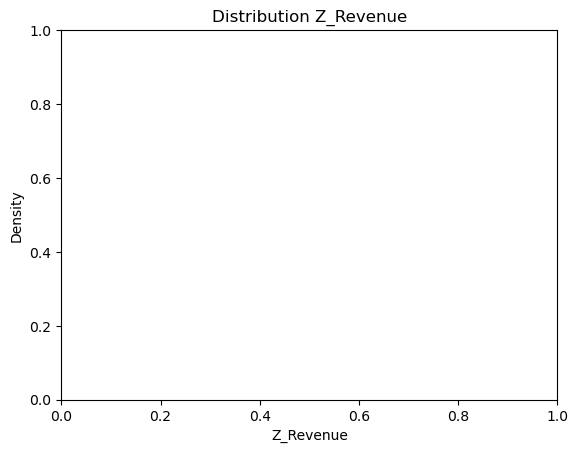

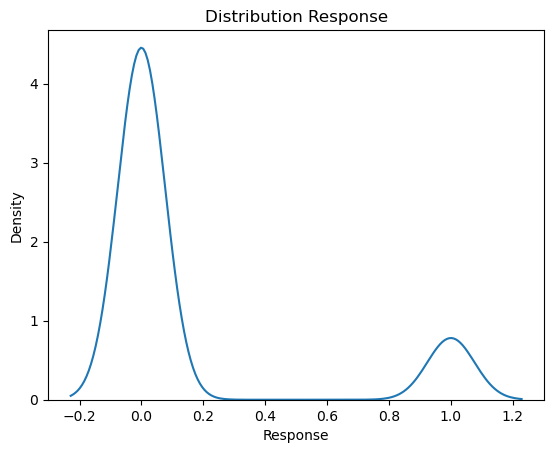

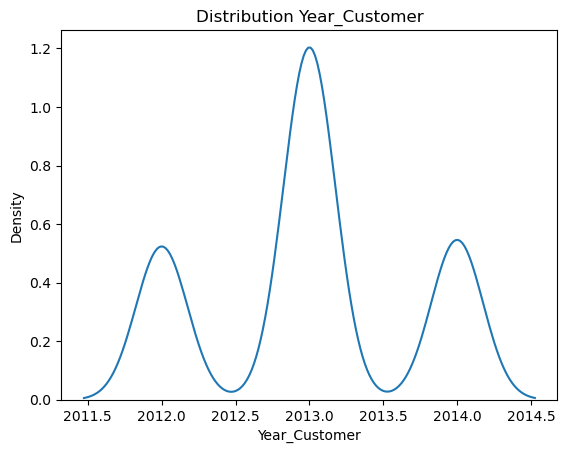

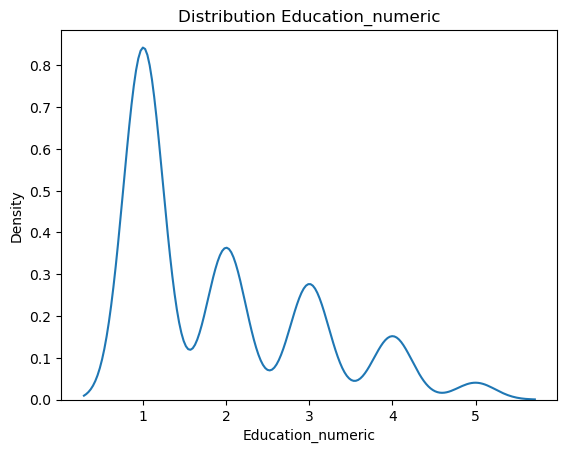

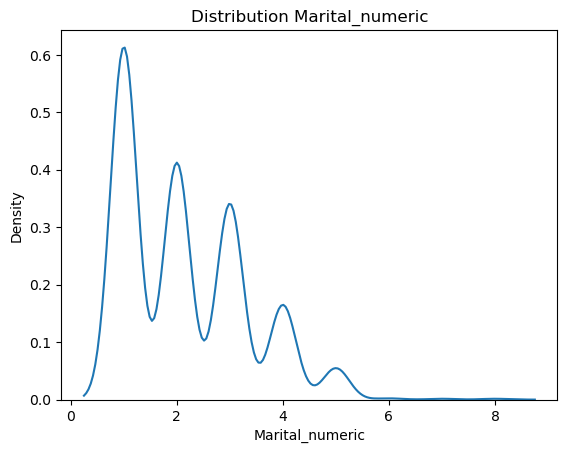

In [15]:
for c in df.columns:
    try:
        sns.kdeplot(df[c])
        plt.title(f"Distribution {c}")
        plt.show()
    except Exception as e:
        print(f"Error plotting for column {c}: {e}")


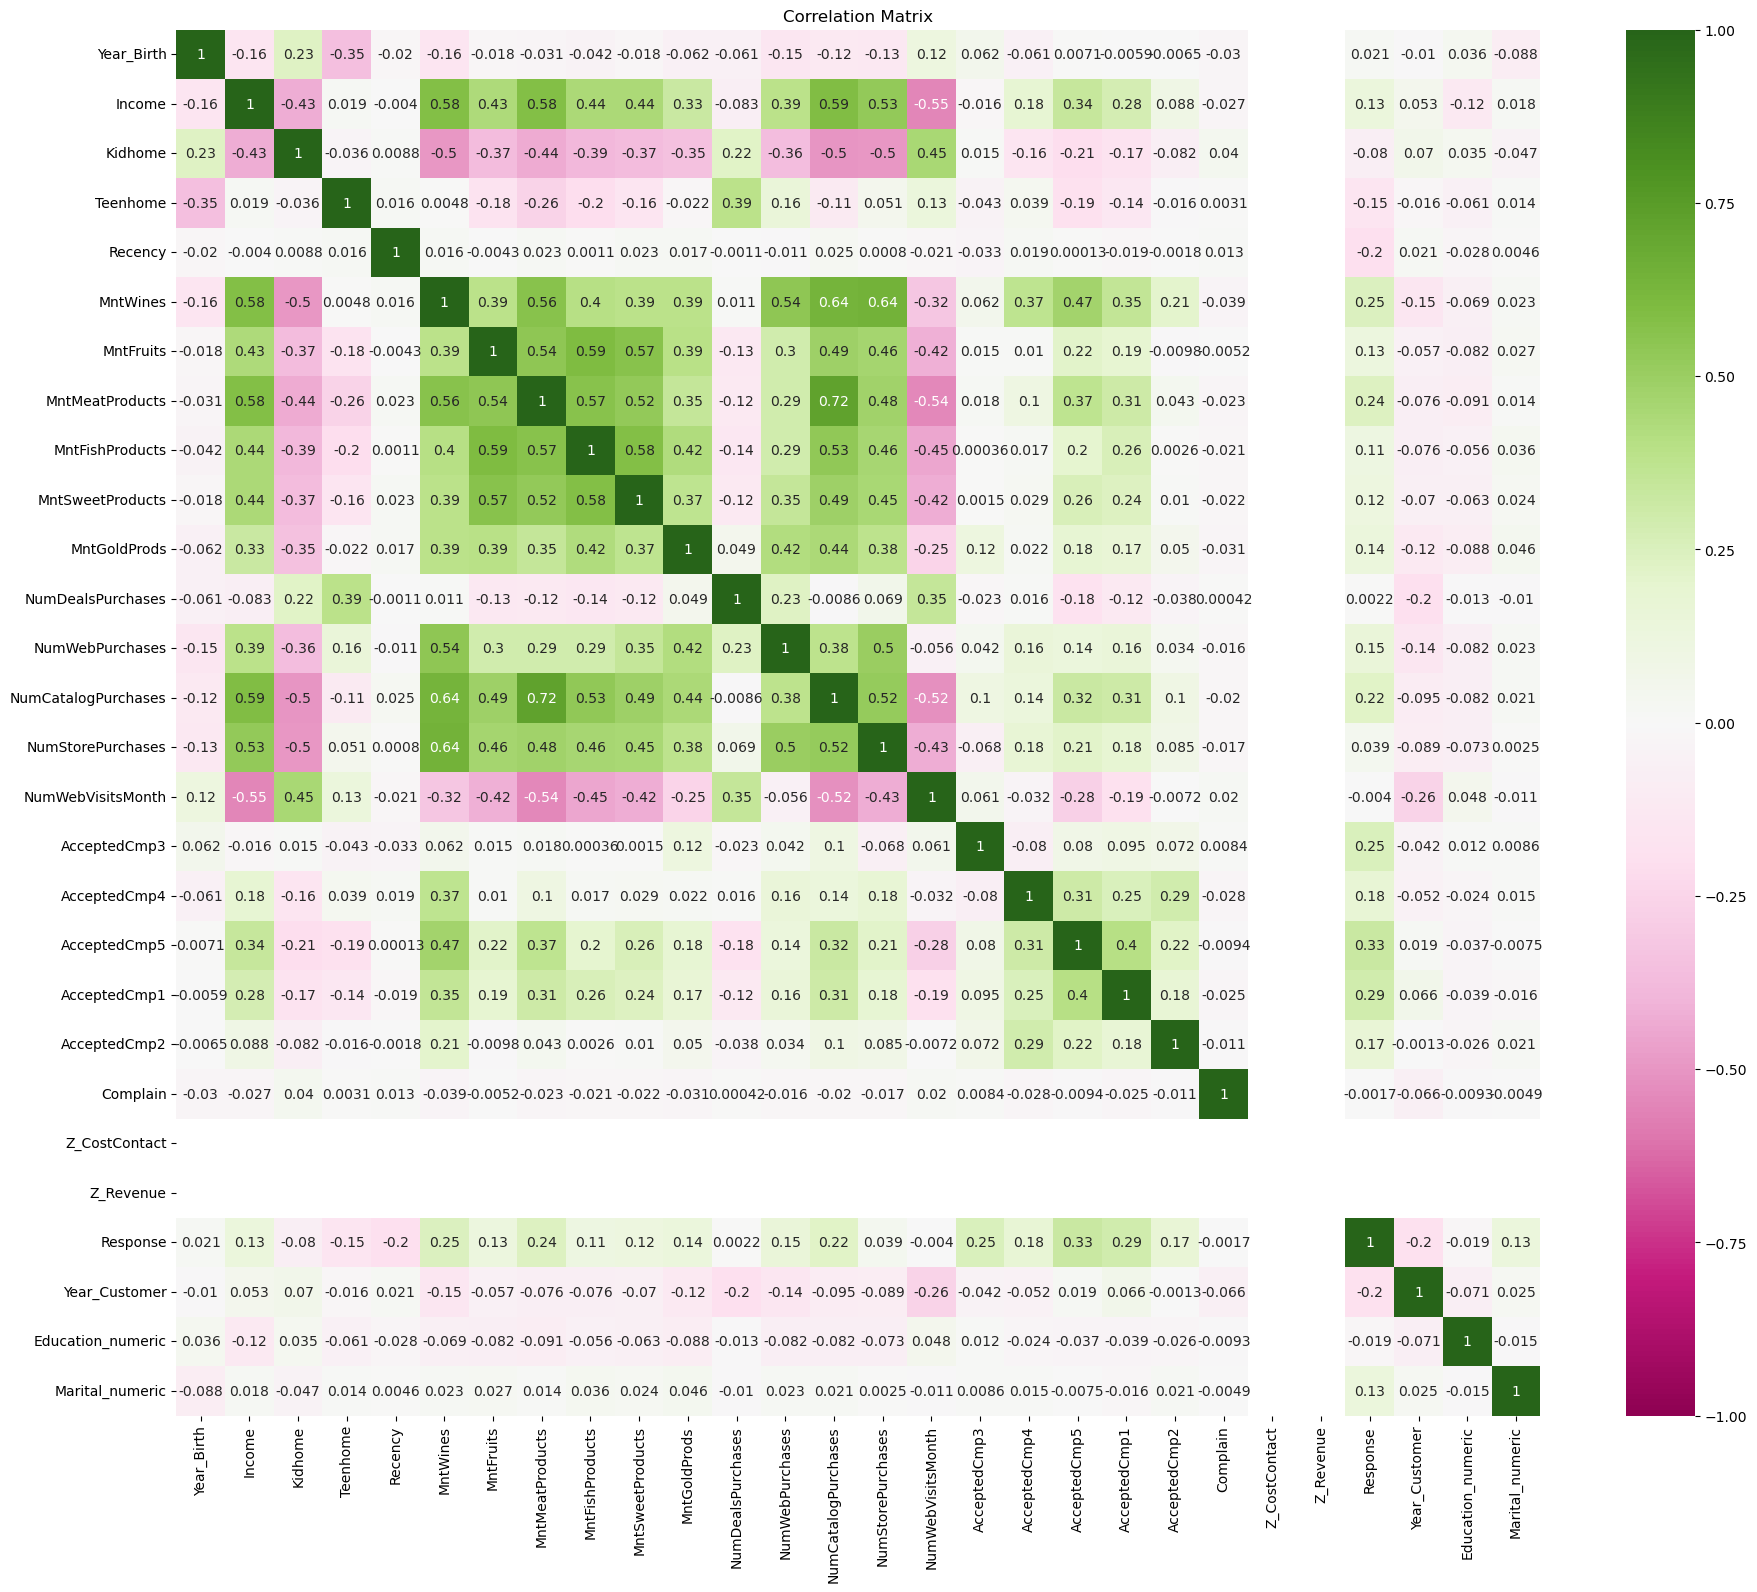

In [16]:

numeric_df = df.select_dtypes(include=["number"])
correlation= numeric_df.corr()
plt.figure(figsize=(22,18))
sns.heatmap(correlation, annot=True ,vmin=-1,vmax=1 , cmap="PiYG")
plt.title("Correlation Matrix")
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because n

<Figure size 2200x1800 with 0 Axes>

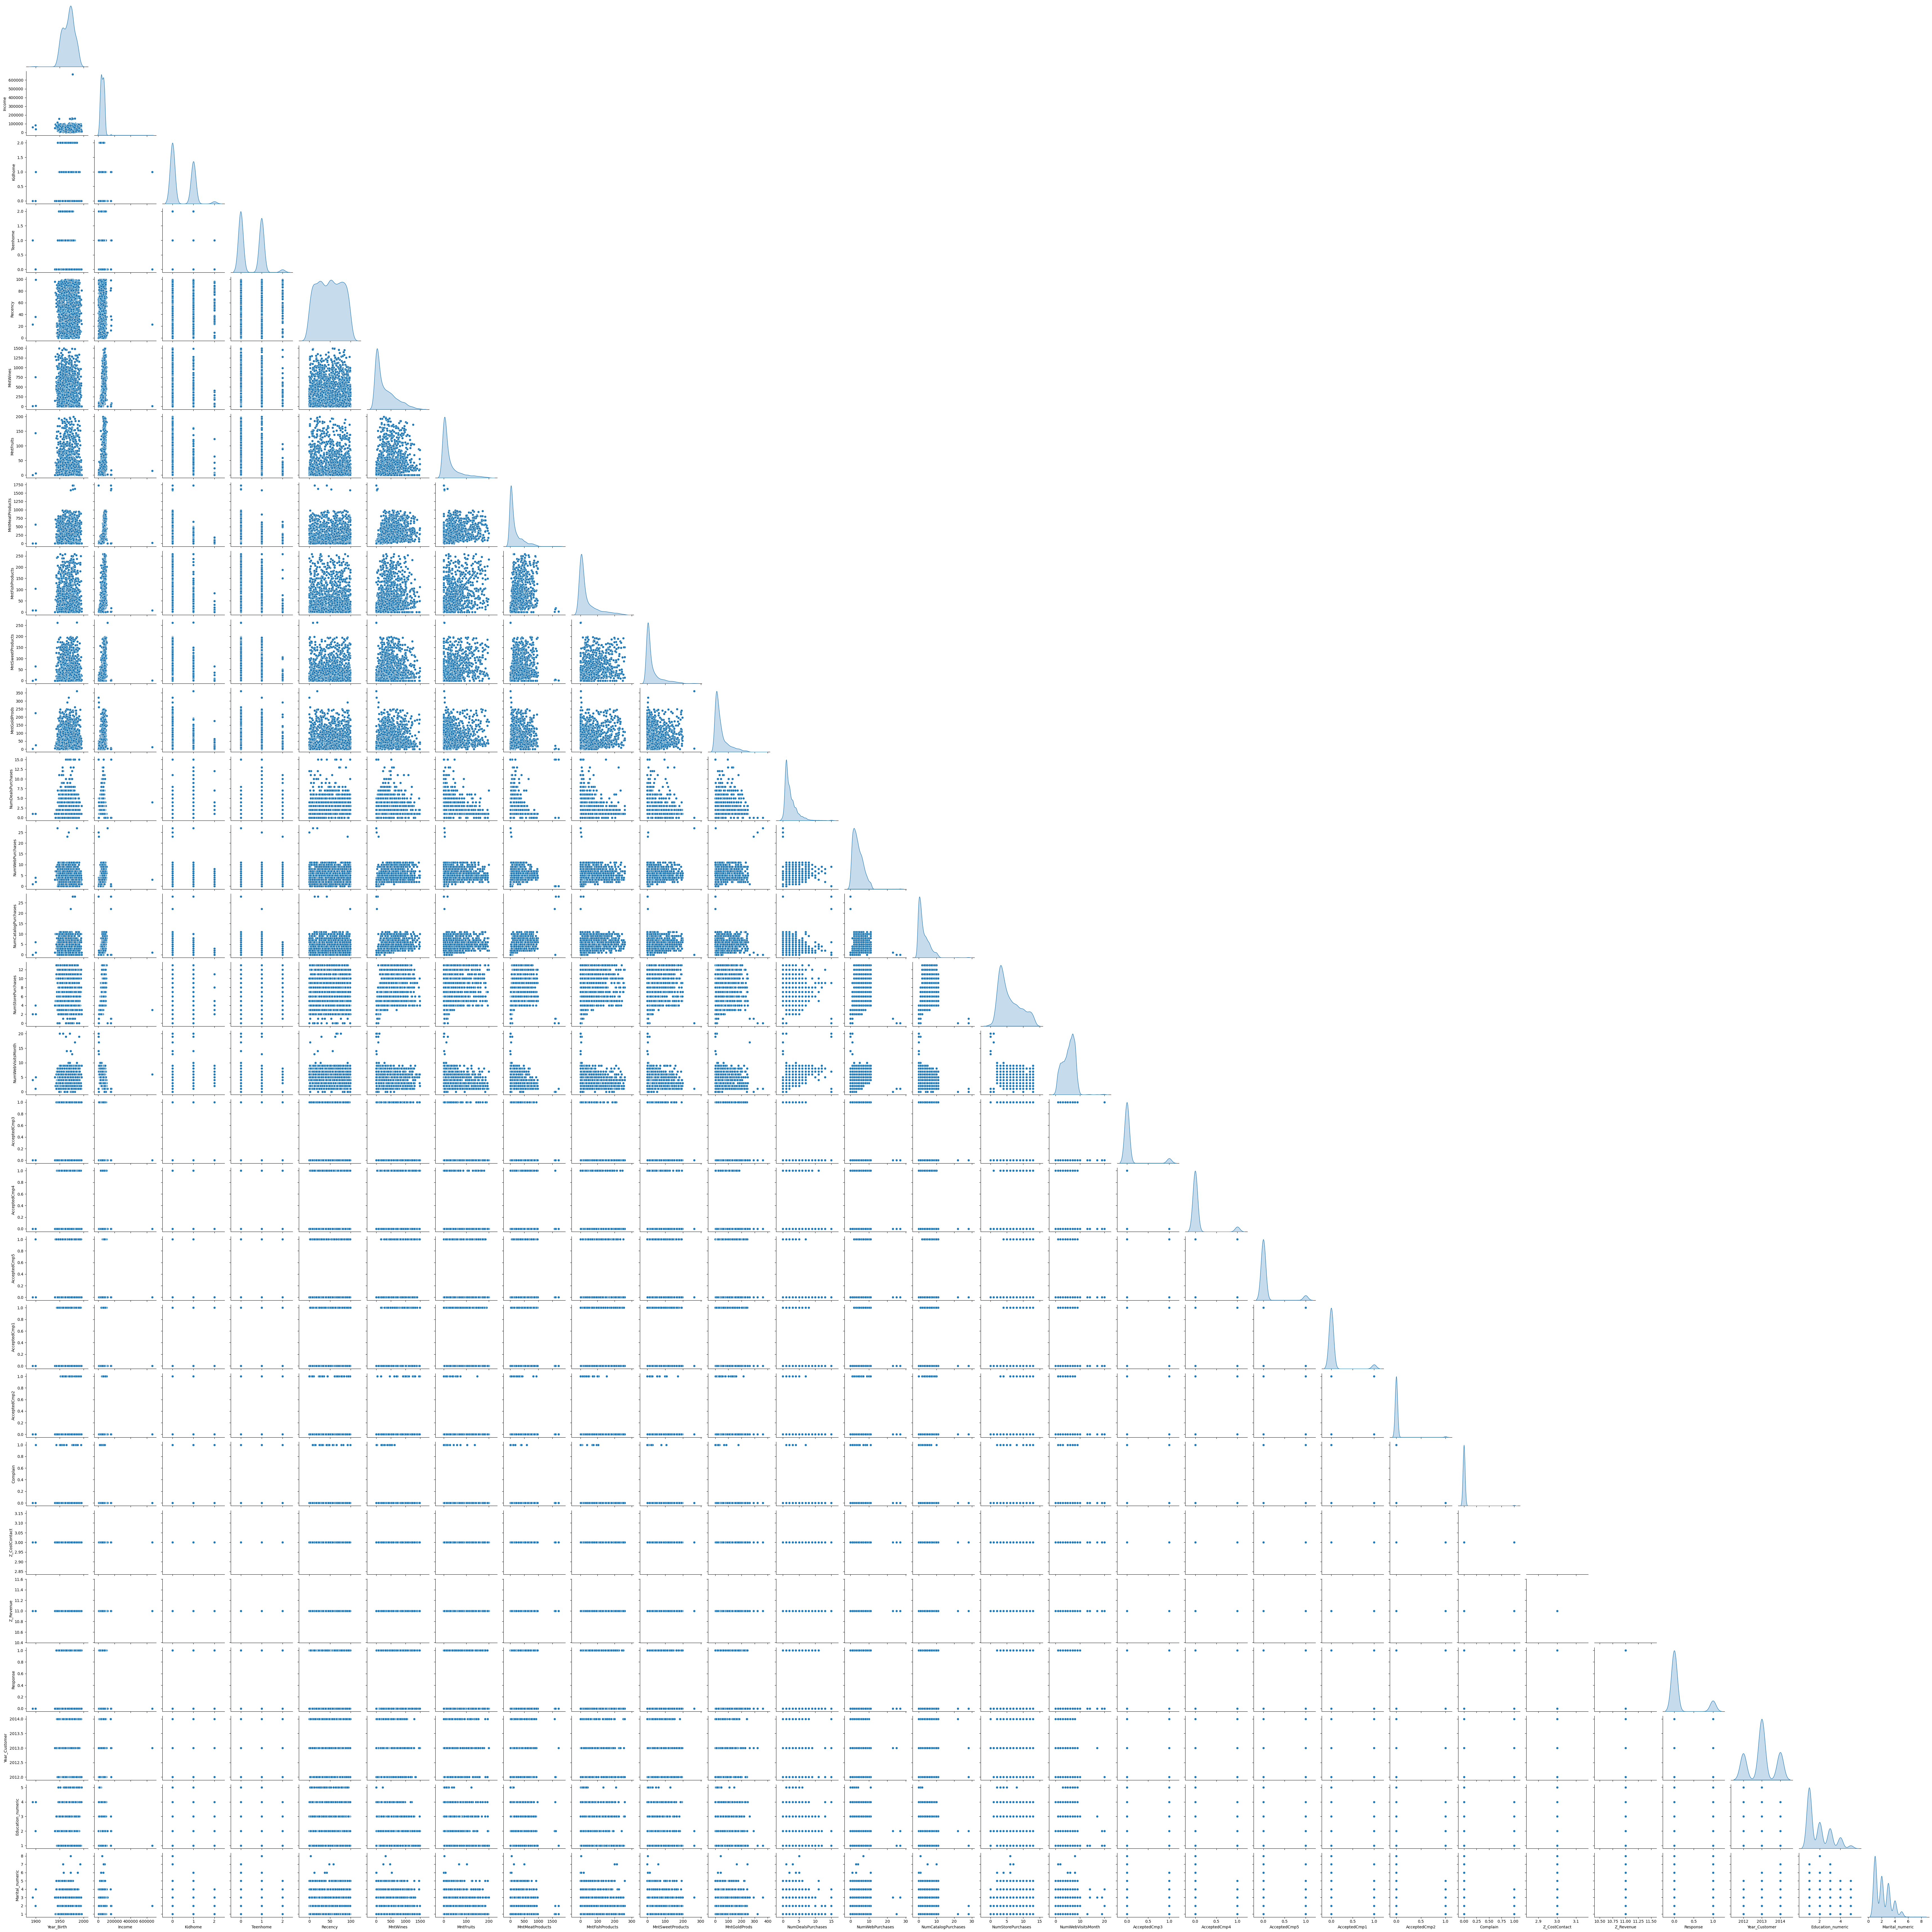

In [17]:
plt.figure(figsize=(22,18))
sns.pairplot(df, diag_kind="kde", corner=True, palette="husl")
plt.show()

In [18]:
df=df.drop(["Education_numeric","Marital_numeric"], axis=1)

In [19]:
imputer=SimpleImputer(strategy="most_frequent")
df_imputed=pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_imputed

Year_Birth   Education Marital_Status   Income Kidhome Teenhome Recency  \
0          1957  Graduation         Single  58138.0       0        0      58   
1          1954  Graduation         Single  46344.0       1        1      38   
2          1965  Graduation       Together  71613.0       0        0      26   
3          1984  Graduation       Together  26646.0       1        0      26   
4          1981         PhD        Married  58293.0       1        0      94   
...         ...         ...            ...      ...     ...      ...     ...   
2235       1967  Graduation        Married  61223.0       0        1      46   
2236       1946         PhD       Together  64014.0       2        1      56   
2237       1981  Graduation       Divorced  56981.0       0        0      91   
2238       1956      Master       Together  69245.0       0        1       8   
2239       1954         PhD        Married  52869.0       1        1      40   

     MntWines MntFruits MntMeatProducts  ... AcceptedCmp3 AcceptedCmp4  \
0         635        88             546  ...            0            0   
1          11         1               6  ...            0            0   
2         426        49             127  ...            0            0   
3          11         4              20  ...            0            0   
4         173        43             118  ...            0            0   
...       ...       ...             ...  ...          ...          ...   
2235      709        43             182  ...            0            0   
2236      406         0              30  ...            0            0   
2237      908        48             217  ...            0            1   
2238      428        30             214  ...            0            0   
2239       84         3              61  ...            0            0   

     AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain Z_CostContact Z_Revenue  \
0               0            0            0        0             3        11   
1               0            0            0        0             3        11   
2               0            0            0        0             3        11   
3               0            0            0        0             3        11   
4               0            0            0        0             3        11   
...           ...          ...          ...      ...           ...       ...   
2235            0            0            0        0             3        11   
2236            0            1            0        0             3        11   
2237            0            0            0        0             3        11   
2238            0            0            0        0             3        11   
2239            0            0            0        0             3        11   

     Response Year_Customer  
0           1        2012.0  
1           0        2014.0  
2           0        2013.0  
3           0        2014.0  
4           0        2013.0  
...       ...           ...  
2235        0        2013.0  
2236        0        2014.0  
2237        0        2013.0  
2238        0        2013.0  
2239        1        2013.0  

[2240 rows x 28 columns]

In [20]:
def remove_outliers_iqr(df_imputed, columns):
    for column in columns:
        Q1 = df_imputed[column].quantile(0.25)
        Q3 = df_imputed[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_imputed = df_imputed[(df_imputed[column] >= lower_bound) & (df_imputed[column] <= upper_bound)]
    return df_imputed

columns_to_check = ["MntWines", "MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumWebVisitsMonth","NumCatalogPurchases","Income","Year_Birth"]
df_cleaned = remove_outliers_iqr(df_imputed, columns_to_check)
df_cleaned

Year_Birth   Education Marital_Status   Income Kidhome Teenhome Recency  \
1          1954  Graduation         Single  46344.0       1        1      38   
3          1984  Graduation       Together  26646.0       1        0      26   
7          1985         PhD        Married  33454.0       1        0      32   
8          1974         PhD       Together  30351.0       1        0      19   
10         1983  Graduation        Married   7500.0       1        0      11   
...         ...         ...            ...      ...     ...      ...     ...   
2229       1972  Graduation        Married  24434.0       2        0       9   
2230       1984  Graduation         Single  11012.0       1        0      82   
2232       1986  Graduation         Single  26816.0       0        0      50   
2234       1974  Graduation        Married  34421.0       1        0      81   
2239       1954         PhD        Married  52869.0       1        1      40   

     MntWines MntFruits MntMeatProducts  ... AcceptedCmp3 AcceptedCmp4  \
1          11         1               6  ...            0            0   
3          11         4              20  ...            0            0   
7          76        10              56  ...            0            0   
8          14         0              24  ...            0            0   
10          5         5               6  ...            0            0   
...       ...       ...             ...  ...          ...          ...   
2229        3         2               8  ...            0            0   
2230       24         3              26  ...            1            0   
2232        5         1               6  ...            0            0   
2234        3         3               7  ...            0            0   
2239       84         3              61  ...            0            0   

     AcceptedCmp5 AcceptedCmp1 AcceptedCmp2 Complain Z_CostContact Z_Revenue  \
1               0            0            0        0             3        11   
3               0            0            0        0             3        11   
7               0            0            0        0             3        11   
8               0            0            0        0             3        11   
10              0            0            0        0             3        11   
...           ...          ...          ...      ...           ...       ...   
2229            0            0            0        0             3        11   
2230            0            0            0        0             3        11   
2232            0            0            0        0             3        11   
2234            0            0            0        0             3        11   
2239            0            0            0        0             3        11   

     Response Year_Customer  
1           0        2014.0  
3           0        2014.0  
7           0        2013.0  
8           1        2013.0  
10          0        2013.0  
...       ...           ...  
2229        0        2013.0  
2230        0        2013.0  
2232        0        2013.0  
2234        0        2013.0  
2239        1        2013.0  

[1095 rows x 28 columns]

In [21]:
df_cleaned.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Year_Customer          0
dtype: int64

In [22]:
le=LabelEncoder()

In [23]:
df_cleaned["Education"]=le.fit_transform(df_cleaned["Education"])
df_cleaned["Marital_Status"]=le.fit_transform(df_cleaned["Marital_Status"])

In [24]:
scaler=MinMaxScaler()

In [25]:
df_scaled=scaler.fit_transform(df_cleaned)

In [26]:
inertia=[]
clusters=range(1,11)

for c in clusters:
    kmeans=KMeans(n_clusters=c)
    kmeans.fit(df_cleaned)
    inertia.append(kmeans.inertia_)

In [27]:
inertia

[188984958198.36346,
 65543308045.7358,
 32445885272.25755,
 20037899882.32095,
 12996650098.851048,
 9375694078.505693,
 6634449903.728692,
 5259384876.075468,
 4009189138.4728584,
 3143540666.356393]

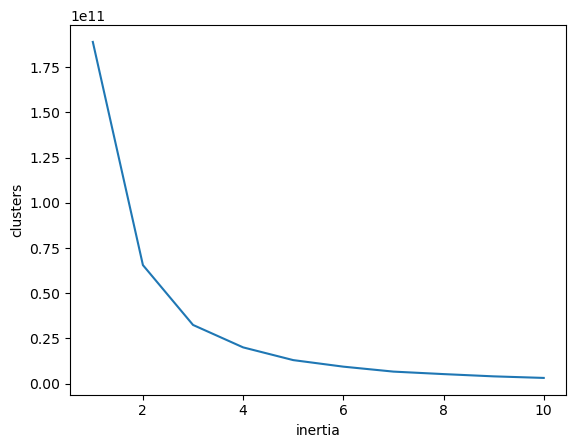

In [28]:
plt.plot(clusters,inertia)
plt.xlabel("inertia")
plt.ylabel("clusters")
plt.show()

In [29]:
kmeans=KMeans(n_clusters=4,random_state=0)
classes=kmeans.fit_predict(df_scaled)
classes

array([3, 0, 0, ..., 0, 0, 1])

In [30]:
df_cleaned["Label"]=classes
df_cleaned

Year_Birth  Education  Marital_Status   Income Kidhome Teenhome Recency  \
1          1954          2               3  46344.0       1        1      38   
3          1984          2               4  26646.0       1        0      26   
7          1985          4               2  33454.0       1        0      32   
8          1974          4               4  30351.0       1        0      19   
10         1983          2               2   7500.0       1        0      11   
...         ...        ...             ...      ...     ...      ...     ...   
2229       1972          2               2  24434.0       2        0       9   
2230       1984          2               3  11012.0       1        0      82   
2232       1986          2               3  26816.0       0        0      50   
2234       1974          2               2  34421.0       1        0      81   
2239       1954          4               2  52869.0       1        1      40   

     MntWines MntFruits MntMeatProducts  ... AcceptedCmp4 AcceptedCmp5  \
1          11         1               6  ...            0            0   
3          11         4              20  ...            0            0   
7          76        10              56  ...            0            0   
8          14         0              24  ...            0            0   
10          5         5               6  ...            0            0   
...       ...       ...             ...  ...          ...          ...   
2229        3         2               8  ...            0            0   
2230       24         3              26  ...            0            0   
2232        5         1               6  ...            0            0   
2234        3         3               7  ...            0            0   
2239       84         3              61  ...            0            0   

     AcceptedCmp1 AcceptedCmp2 Complain Z_CostContact Z_Revenue Response  \
1               0            0        0             3        11        0   
3               0            0        0             3        11        0   
7               0            0        0             3        11        0   
8               0            0        0             3        11        1   
10              0            0        0             3        11        0   
...           ...          ...      ...           ...       ...      ...   
2229            0            0        0             3        11        0   
2230            0            0        0             3        11        0   
2232            0            0        0             3        11        0   
2234            0            0        0             3        11        0   
2239            0            0        0             3        11        1   

     Year_Customer Label  
1           2014.0     3  
3           2014.0     0  
7           2013.0     0  
8           2013.0     1  
10          2013.0     0  
...            ...   ...  
2229        2013.0     0  
2230        2013.0     0  
2232        2013.0     0  
2234        2013.0     0  
2239        2013.0     1  

[1095 rows x 29 columns]